# Imports

In [2]:
import numpy as np
import glob
import cv2
import pandas as pd
from keras.preprocessing import image
from matplotlib import pyplot as plt
from PIL import Image,ImageOps
from scipy.ndimage import imread


Using TensorFlow backend.


# Reading Image 

['/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_1.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_4.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_8.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_3.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_6.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_2.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_7.jpg'

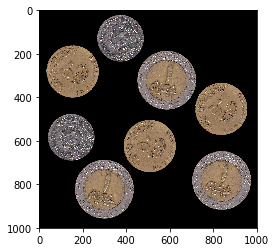

<Figure size 432x288 with 0 Axes>

In [3]:
filelist = glob.glob('/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/*.jpg')
print(filelist)
try_image = filelist[2]
image = cv2.imread(try_image)
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)
plt.figure()
plt.show()


# From RGB to Gray

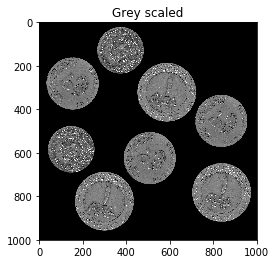

In [4]:
gray_image = cv2.cvtColor(RGB_image, cv2.COLOR_BGR2GRAY)
plt.title('Grey scaled')
plt.imshow(gray_image,  cmap='gray')
plt.show()

# Smoothing the image

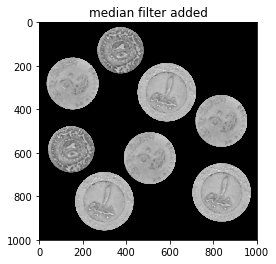

In [6]:
median = cv2.medianBlur(gray_image,7)
plt.figure()
plt.title('median filter added')
plt.imshow(median , cmap='gray')

# Edge Detection

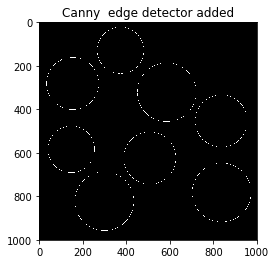

In [7]:
edges = cv2.Canny(median,250,280)
plt.figure()
plt.title('Canny  edge detector added')
plt.imshow(edges , cmap='gray')


# Accumulation into (a, b)-space using circular Hough transform

In [13]:
def detectCircles(edges, R):
    circles = []
    rows,coloumns = edges.shape
    
    accumulator = np.zeros((rows,coloumns))
 
    for u in range (rows):
        for v in range (coloumns):
            if edges[u,v]==255:
                 for angle in range(0,360): 
                        b = (int)(v - round(R * np.sin(angle * np.pi/180)  ))
                        a = (int)(u - round(R *np.cos(angle * np.pi/180) ))
                        if a >= 0 and a < rows and b >= 0 and b < coloumns: 
                            accumulator[a,b] += 1
                             

    return accumulator   

# Refining Coordinates and CHT Post-Processing

In [14]:
def CirclesForR(Circles,R):
    Circles = []
    res = detectCircles(edges,R)
    res[res<(res.max()-20)]=0   # here i take the highest 20 occurences of the peak functions
    indices = np.where(res == res.max())
    rows,cols = res.shape
    for i in range(rows):
        for j in range(cols): 
            if (res[i][j])!=0:
                Circles.append((i,j,R))
    return Circles